In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

The execution of this code takes atleast 10 mins.

In [ ]:
def build_model(D,Q):

  train_data = np.array([])
  test_data = np.array([])
  
  if(D == 2):
    df = pd.read_csv('/content/drive/MyDrive/dataset-PRML-Assignment-1/train_24.csv')
    dft = pd.read_csv('/content/drive/MyDrive/dataset-PRML-Assignment-1/test_24.csv')
    train_data = np.array(df)
    test_data = np.array(dft)

  if(D == 3):
    df = pd.read_csv('/content/drive/MyDrive/dataset-PRML-Assignment-1/train_243.csv')
    dft = pd.read_csv('/content/drive/MyDrive/dataset-PRML-Assignment-1/test_243.csv')
    train_data = np.array(df)
    test_data = np.array(dft)
  
  P = len(train_data[0])-1
  N = len(train_data)
  s = set()
  for i in range(N):
    s.add(train_data[i][2])
  C = len(s)

  def variance(ls):
    avg = sum(ls) / len(ls)
    variance = sum(map(lambda x: ((x-avg) ** 2), ls))/float(len(ls))
    return variance

  def covar_matrix(C,P,data):
    r = []
    for k in range(C):
        m = []
        for i in range(P):
            v = []
            for j in range(P):
                if(i == j):
                    v.append(variance(data[k][:,i]))
                else:
                    v.append(0)
            m.append(np.array(v))
        r.append(np.array(m))
    return r

  def Total_Variance(P,data):
    m = []
    for i in range(P):
        v = []
        for j in range(P):
            if(i == j):
                v.append(variance(data[:,i]))
            else:
                v.append(0)
        m.append(np.array(v))
    return m

  def classification(data,c):
    classf = []
    Nf = len(data)
    for j in range(c):
        m = []
        for i in range(Nf):
            if(data[i][2] == j):
                m.append(data[i][0:2])
        classf.append(np.array(m))
    return classf

  def probability_class(C,train_class):
    prob_class = []  
    for i in range(C):
        p = len(train_class[i])/N
        prob_class.append(p)
    return prob_class
  
  def covar_make(a,C):
    r = []
    for i in range(C):
      r.append(a)
    return r


  train_class = classification(train_data,C)
  prob_class = probability_class(C,train_class)

  covariance_matrix = np.array([])

  if(Q == 3):
    covariance_matrix = np.array(covar_matrix(C,P,train_class))
  elif(Q == 1):
    r = np.array([1,0,0,1]).reshape(2,2)
    covariance_matrix = np.array(covar_make(r,C))
  else:
    r = Total_Variance(P,train_data)
    covariance_matrix = np.array(covar_make(r,C))

  def mean_function(class_arr):
    l = len(class_arr)
    sum = 0
    m = []
    for j in range(P):
        sum = 0
        for i in range(l):
            sum += (class_arr[i][j])
        m.append(sum/l)
    return np.array(m) 

  def GaussianD(mean,covar,x):
    arr = (x-mean)
    t = arr.reshape(len(arr),1)
    p = (1/math.sqrt(((2*math.pi)**P)*(np.linalg.det(covar)))) * math.exp((-1)*0.5 * np.dot(np.dot(np.transpose(t),np.linalg.inv(covar)),t))
    return p

  def GaussianPC(x):
    listc = []
    maxv = 0
    ans = -1
    for i in range(C):
        p = GaussianD(mean_function(train_class[i]),covariance_matrix[i],x)
        h = p * prob_class[i]
        if i == 0:
            maxv = h
        else:
            maxv = max(maxv,h)
        listc.append((h,i))
    
    for i in range(len(listc)):
        if(listc[i][0] >= maxv):
            ans = i
            break
    return ans

  def Accuracy(td):
    sum = 0
    Nt = len(td)
    for i in range(Nt):
        class_x = GaussianPC(td[i][0:2])
        if(class_x == td[i][2]):
            sum += 1
    return ((sum/Nt)*100,100 - (sum/Nt)*100)

  def predicte(td):
    Nt = len(td)
    predicted = []
    for i in range(Nt):
        m = []
        class_x = GaussianPC(td[i][0:2])
        for j in range(P):
            m.append(td[i][j])
        m.append(class_x)
        predicted.append(np.array(m))
    return np.array(predicted)
  
  def confusion_matrix(predict,original):
    n = len(np.unique(np.array(predict)))
    x = np.zeros((n,n))
    for i in range(len(predict)):
      x[int(original[i])][int(predict[i])]+=1
    return x
   
  def plot(predicte,train_data,test_data):
    plt.xlabel("x")
    plt.ylabel("y")
    x_min,x_max = train_data[:,0].min()-0.01, train_data[:,0].max()+0.01
    y_min,y_max = train_data[:,1].min()-0.01, train_data[:,1].max()+0.01
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.05),np.arange(y_min,y_max,0.05))
    z = predicte(np.c_[xx.ravel(),yy.ravel()])[:,2]
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z)

    sns.scatterplot(x = test_data[:,0], y = test_data[:,1], hue = test_data[:,2])
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.title("Naive Bayes")
    plt.show()

  predicted_test= predicte(test_data)
  predicted_train = predicte(train_data)

  print(Accuracy(test_data))
  print(Accuracy(train_data))
  plot(predicte,train_data,test_data)

  # confusion matrices of test and train data
  a = confusion_matrix(predicted_train[:,2], train_data[:,2])
  b = confusion_matrix(predicted_test[:,2],test_data[:,2])
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
  ax1.set_title('train confusion matrix')
  ax2.set_title('test confusion matrix')
  sns.heatmap(a, ax=ax1, annot=True, fmt='g')
  sns.heatmap(b, ax=ax2, annot=True)

Question 2- part (a)

(99.0, 1.0)
(100.0, 0.0)


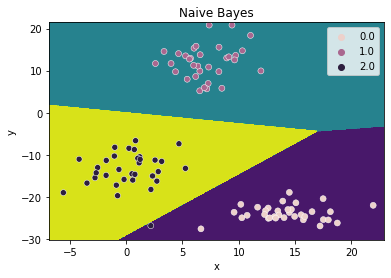

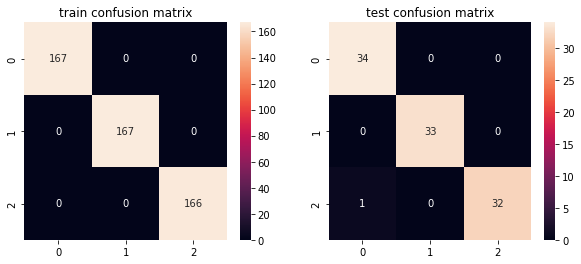

In [ ]:
build_model(2,1)

Question 2 - Part (b) 

(76.0, 24.0)
(79.2, 20.799999999999997)


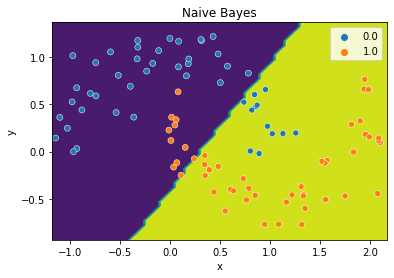

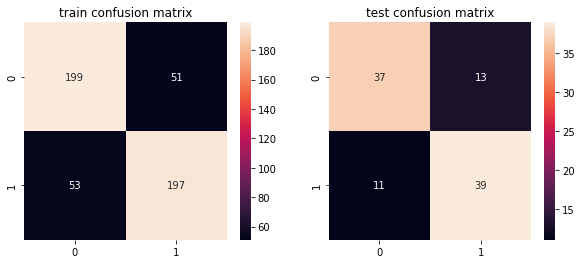

In [ ]:
build_model(3,1)

Question 2 - part (c)

(100.0, 0.0)
(99.8, 0.20000000000000284)


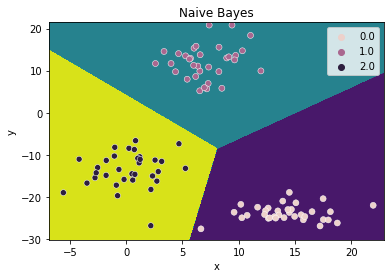

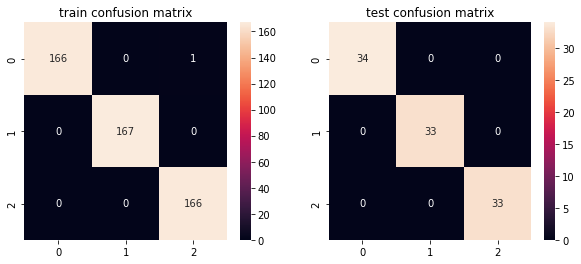

In [ ]:
build_model(2,2)

Question 2 - part (d) 

(88.0, 12.0)
(86.0, 14.0)


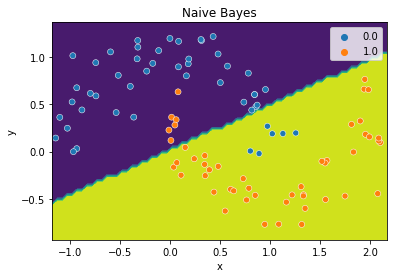

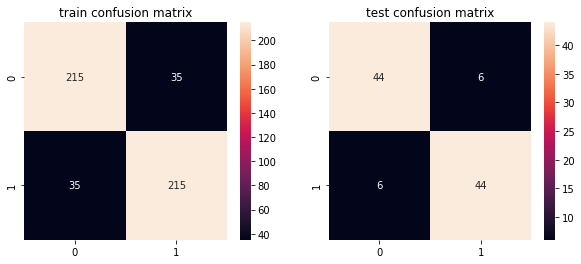

In [ ]:
build_model(3,2)

Question 2 - part (e)

(100.0, 0.0)
(100.0, 0.0)


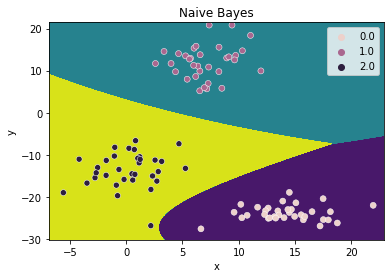

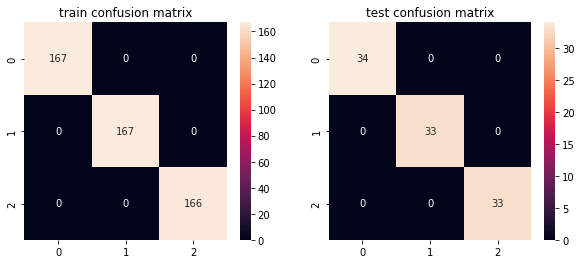

In [ ]:
build_model(2,3)

Question 2 - part (f) 

(87.0, 13.0)
(87.4, 12.599999999999994)


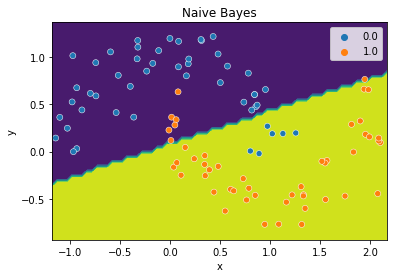

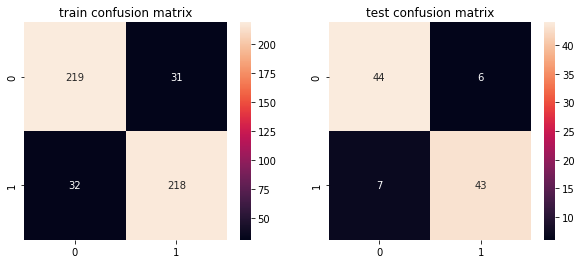

In [ ]:
build_model(3,3)